In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
samples_4mu = [
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

samples_bkg = [
    "TTJets",
]

In [3]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2", max_files=10, location_cfg="signal_v6.yaml")
fileset_2mu = utilities.make_fileset(samples_2mu, "llpNanoAOD_v2", max_files=10, location_cfg="signal_v6.yaml")
fileset_bkg = utilities.make_fileset(samples_bkg, "llpNanoAOD_v2", max_files=10, location_cfg="backgrounds.yaml")

fileset_4mu['TTJets'] = fileset_bkg['TTJets']
fileset_2mu['TTJets'] = fileset_bkg['TTJets']

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    maxchunks=10,
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
)

output_4mu = runner.run(fileset_4mu, treename="Events", processor_instance=p)
output_2mu = runner.run(fileset_2mu, treename="Events", processor_instance=p)

out_4mu = output_4mu["out"]
out_2mu = output_2mu["out"]

Output()

Output()

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Output()

Output()

In [4]:
samples_4mu = [
    "TTJets",
    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_0p8mm",
    "4Mu_500GeV_5p0GeV_8p0mm",
    "4Mu_500GeV_5p0GeV_40p0mm",
    "4Mu_500GeV_5p0GeV_80p0mm",   
]


samples_2mu = [
    "TTJets",
    
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_0p8mm",
    "2Mu2E_500GeV_5p0GeV_8p0mm",
    "2Mu2E_500GeV_5p0GeV_40p0mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",   
]

In [5]:
for sample in samples_4mu:
    print(sample, "Total LJ", out_4mu[sample]['counters']['0.4']['base']['Total LJs'])
    print(sample, "Mu-LJs", out_4mu[sample]['counters']['0.4']['base']['Total Mu-LJs'])
    print(sample, "EGM-LJs", out_4mu[sample]['counters']['0.4']['base']['Total EGM-LJs'])
    print(sample, "Total Matched-Jets", out_4mu[sample]['counters']['0.4']['base']['Total Matched-Jets'])
    print(sample, "Leading-Mu-Matched-Jets", out_4mu[sample]['counters']['0.4']['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Subleading-Mu-Matched-Jets", out_4mu[sample]['counters']['0.4']['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "EGM-Matched-Jets", out_4mu[sample]['counters']['0.4']['base']['Total EGM-Matched-Jets'])
    print("")

TTJets Total LJ 3955
TTJets Mu-LJs 196
TTJets EGM-LJs 3759
TTJets Total Matched-Jets 3947
TTJets Leading-Mu-Matched-Jets 194
TTJets Subleading-Mu-Matched-Jets 2
TTJets EGM-Matched-Jets 1972

4Mu_500GeV_5p0GeV_0p08mm Total LJ 99714
4Mu_500GeV_5p0GeV_0p08mm Mu-LJs 99661
4Mu_500GeV_5p0GeV_0p08mm EGM-LJs 53
4Mu_500GeV_5p0GeV_0p08mm Total Matched-Jets 99662
4Mu_500GeV_5p0GeV_0p08mm Leading-Mu-Matched-Jets 49831
4Mu_500GeV_5p0GeV_0p08mm Subleading-Mu-Matched-Jets 49826
4Mu_500GeV_5p0GeV_0p08mm EGM-Matched-Jets 53

4Mu_500GeV_5p0GeV_0p8mm Total LJ 93552
4Mu_500GeV_5p0GeV_0p8mm Mu-LJs 93509
4Mu_500GeV_5p0GeV_0p8mm EGM-LJs 43
4Mu_500GeV_5p0GeV_0p8mm Total Matched-Jets 93508
4Mu_500GeV_5p0GeV_0p8mm Leading-Mu-Matched-Jets 46753
4Mu_500GeV_5p0GeV_0p8mm Subleading-Mu-Matched-Jets 46749
4Mu_500GeV_5p0GeV_0p8mm EGM-Matched-Jets 43

4Mu_500GeV_5p0GeV_8p0mm Total LJ 62721
4Mu_500GeV_5p0GeV_8p0mm Mu-LJs 62668
4Mu_500GeV_5p0GeV_8p0mm EGM-LJs 53
4Mu_500GeV_5p0GeV_8p0mm Total Matched-Jets 62463
4Mu_500GeV

In [6]:
for sample in samples_2mu:
    print(sample, "Total LJ", out_2mu[sample]['counters']['0.4']['base']['Total LJs'])
    print(sample, "Mu-LJs", out_2mu[sample]['counters']['0.4']['base']['Total Mu-LJs'])
    print(sample, "EGM-LJs", out_2mu[sample]['counters']['0.4']['base']['Total EGM-LJs'])
    print(sample, "Total Matched-Jets", out_2mu[sample]['counters']['0.4']['base']['Total Matched-Jets'])
    print(sample, "Leading-Mu-Matched-Jets", out_2mu[sample]['counters']['0.4']['base']['Total Leading-Mu-Matched-Jets'])
    print(sample, "Subleading-Mu-Matched-Jets", out_2mu[sample]['counters']['0.4']['base']['Total Subleading-Mu-Matched-Jets'])
    print(sample, "EGM-Matched-Jets", out_2mu[sample]['counters']['0.4']['base']['Total EGM-Matched-Jets'])
    print("")

TTJets Total LJ 3955
TTJets Mu-LJs 196
TTJets EGM-LJs 3759
TTJets Total Matched-Jets 3947
TTJets Leading-Mu-Matched-Jets 194
TTJets Subleading-Mu-Matched-Jets 2
TTJets EGM-Matched-Jets 1972

2Mu2E_500GeV_5p0GeV_0p08mm Total LJ 87866
2Mu2E_500GeV_5p0GeV_0p08mm Mu-LJs 43924
2Mu2E_500GeV_5p0GeV_0p08mm EGM-LJs 43942
2Mu2E_500GeV_5p0GeV_0p08mm Total Matched-Jets 87828
2Mu2E_500GeV_5p0GeV_0p08mm Leading-Mu-Matched-Jets 43911
2Mu2E_500GeV_5p0GeV_0p08mm Subleading-Mu-Matched-Jets 13
2Mu2E_500GeV_5p0GeV_0p08mm EGM-Matched-Jets 43906

2Mu2E_500GeV_5p0GeV_0p8mm Total LJ 72975
2Mu2E_500GeV_5p0GeV_0p8mm Mu-LJs 36468
2Mu2E_500GeV_5p0GeV_0p8mm EGM-LJs 36507
2Mu2E_500GeV_5p0GeV_0p8mm Total Matched-Jets 72930
2Mu2E_500GeV_5p0GeV_0p8mm Leading-Mu-Matched-Jets 36459
2Mu2E_500GeV_5p0GeV_0p8mm Subleading-Mu-Matched-Jets 7
2Mu2E_500GeV_5p0GeV_0p8mm EGM-Matched-Jets 36461

2Mu2E_500GeV_5p0GeV_8p0mm Total LJ 17786
2Mu2E_500GeV_5p0GeV_8p0mm Mu-LJs 8887
2Mu2E_500GeV_5p0GeV_8p0mm EGM-LJs 8899
2Mu2E_500GeV_5p0GeV

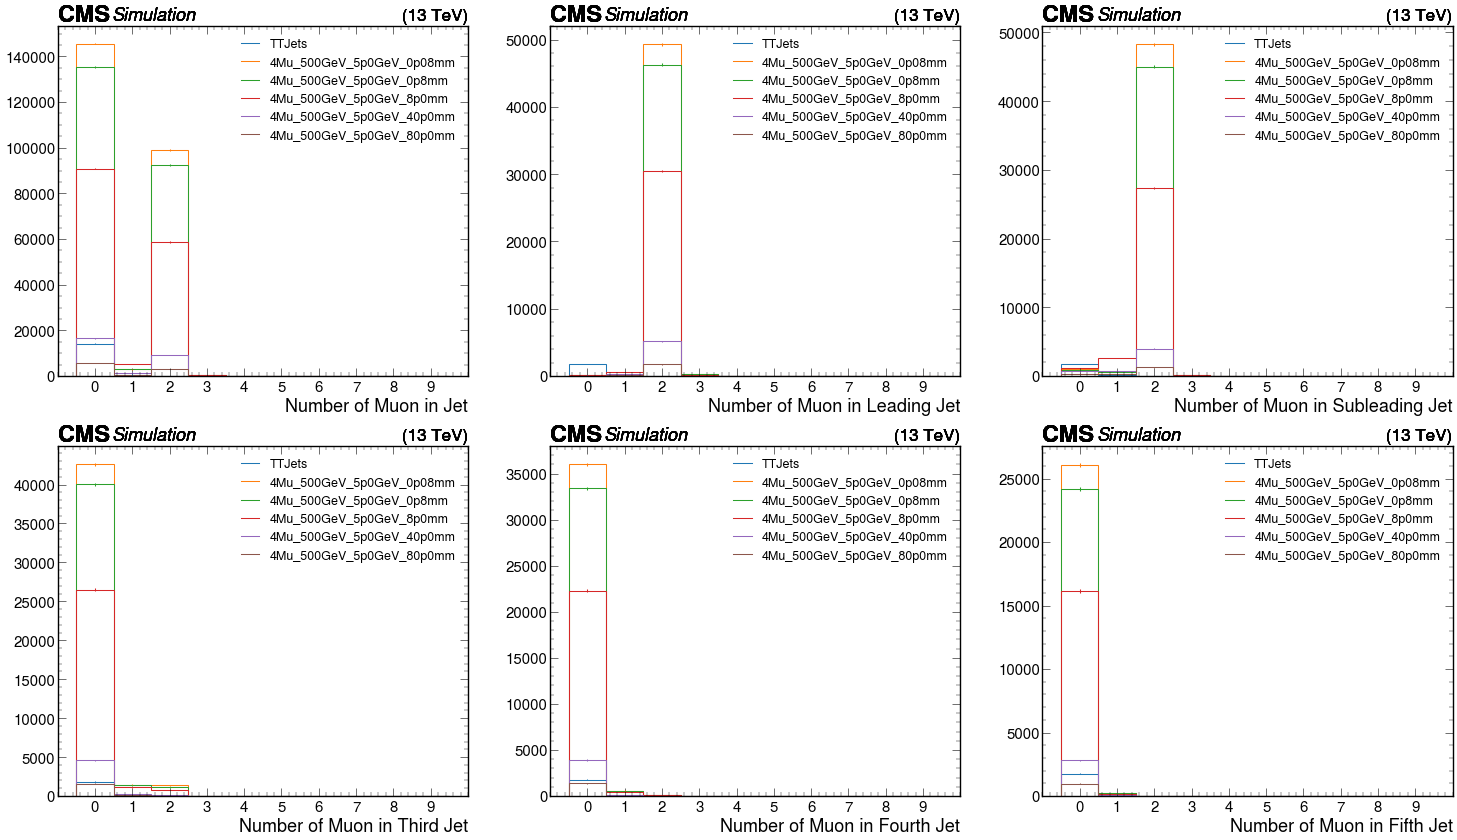

In [7]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

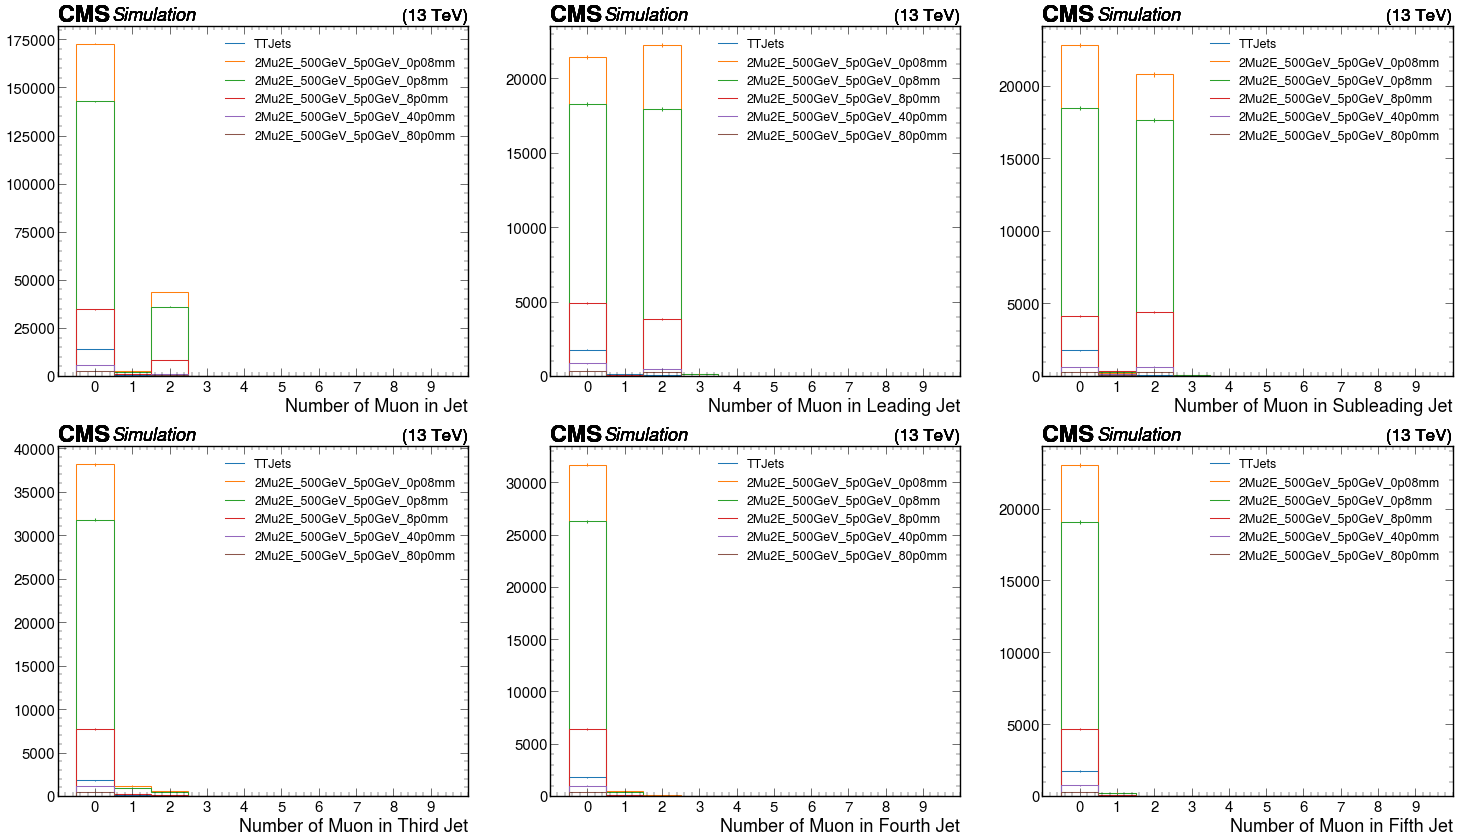

In [8]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

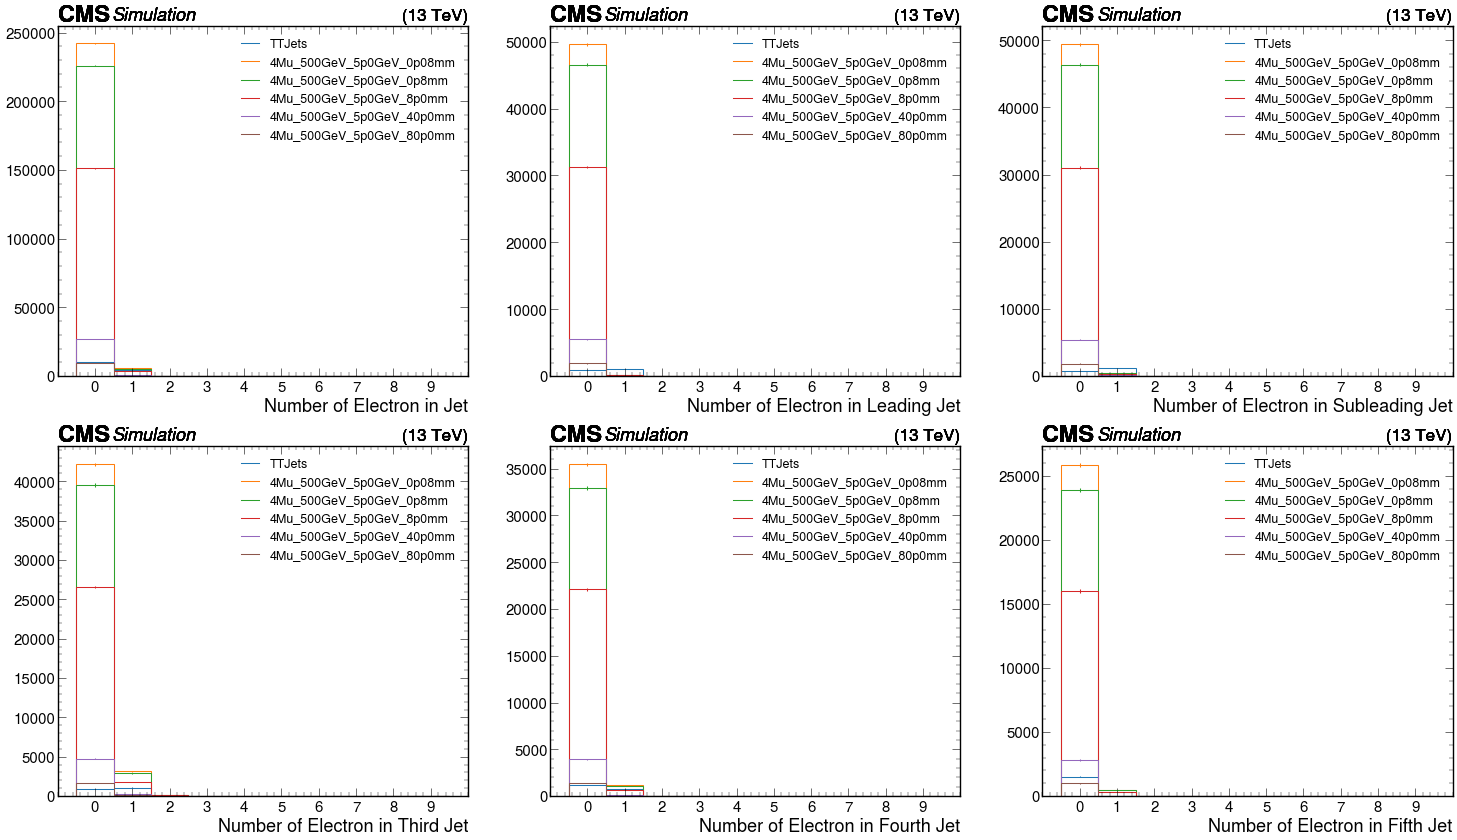

In [9]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet1_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet2_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet3_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet4_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["jet5_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

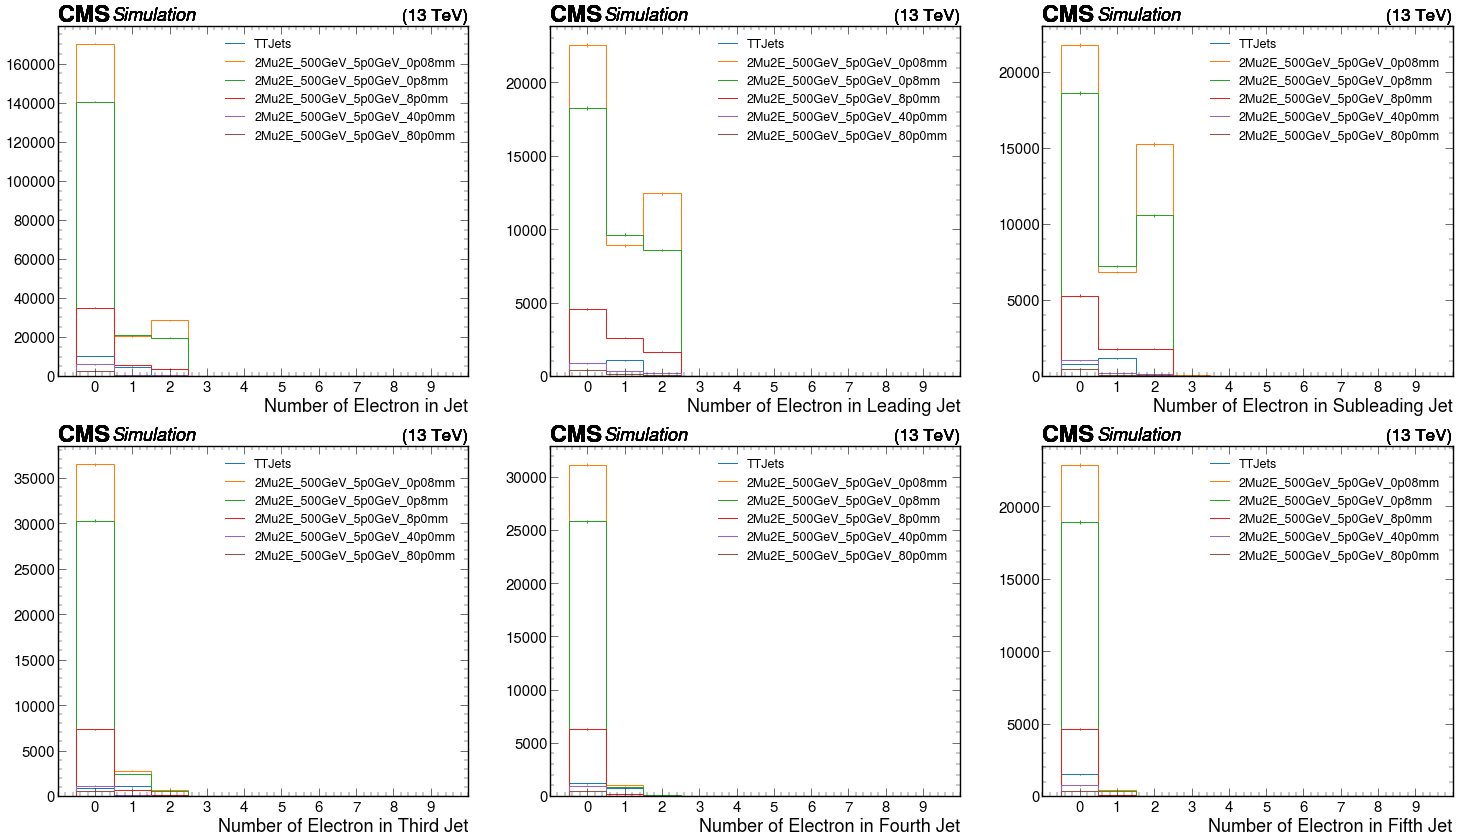

In [10]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet1_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet2_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet3_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet4_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["jet5_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

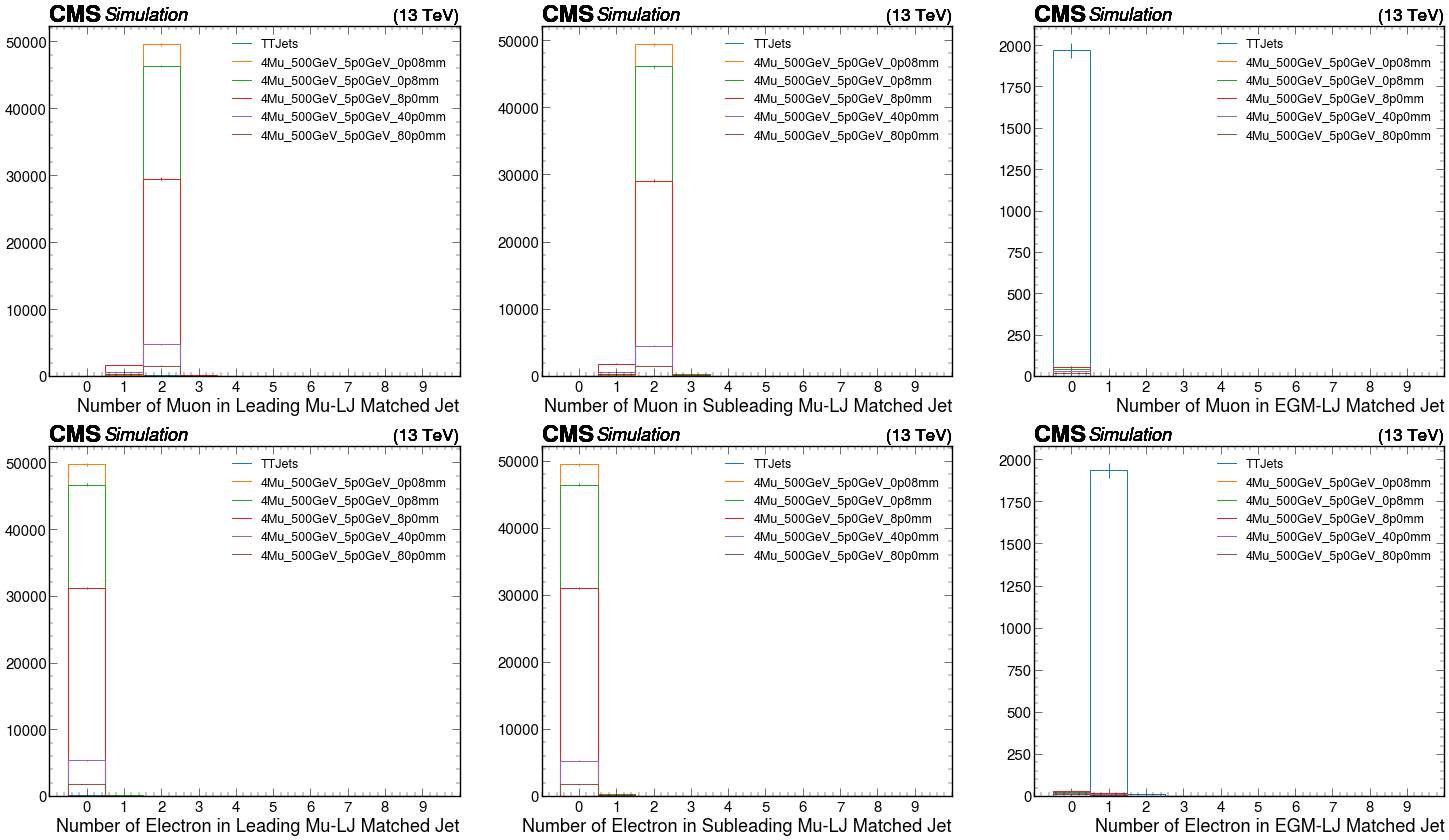

In [11]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["egm_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["leading_mu_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["subleading_mu_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out_4mu[sample]["hists"]["egm_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


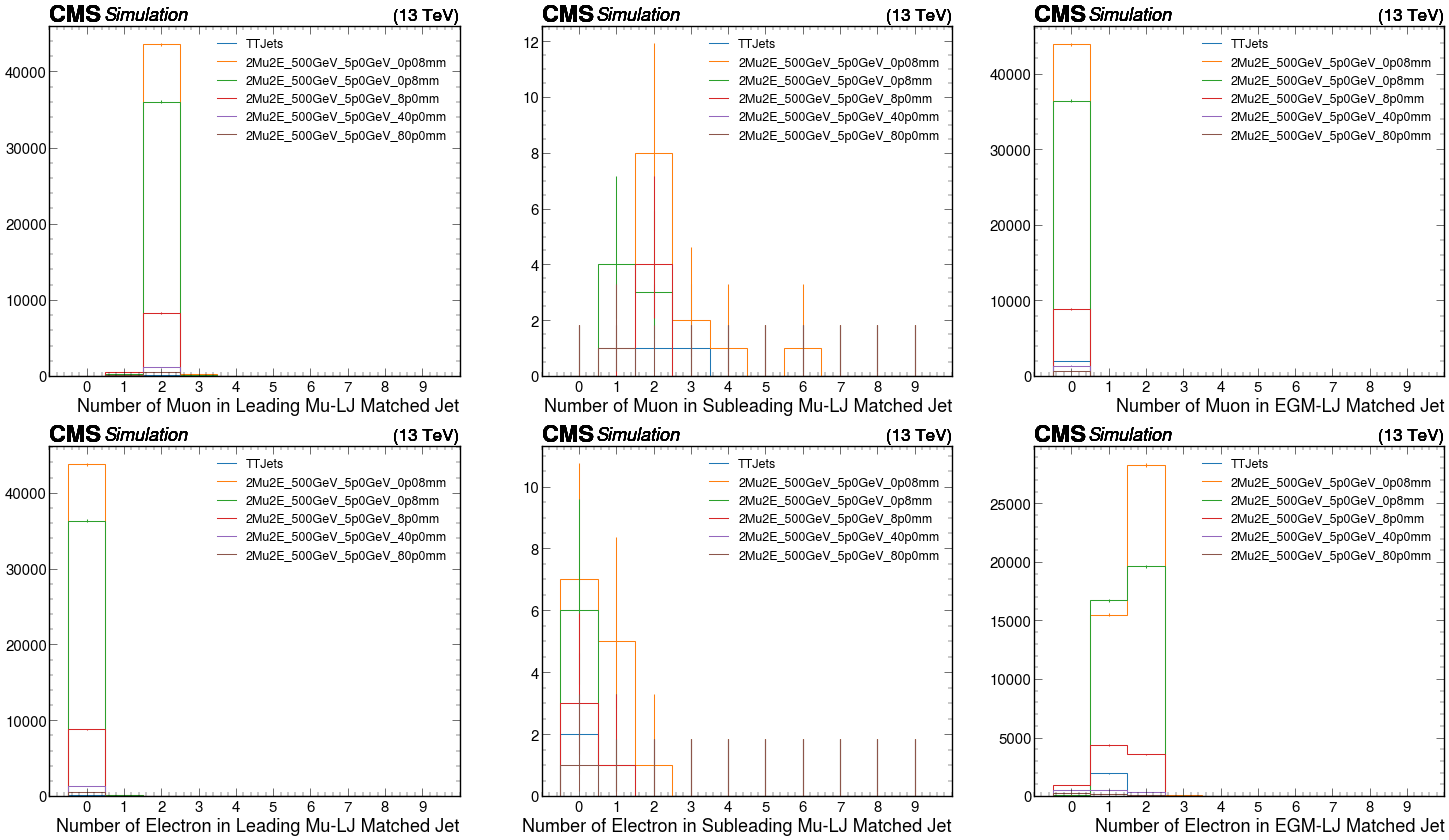

In [12]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_mu_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_nmuon"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["leading_mu_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["subleading_mu_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_2mu:
    utilities.plot(out_2mu[sample]["hists"]["egm_matchedjet_nelectron"][channels[0], :])
plt.legend(samples_2mu, loc=1, prop={'size': 18})